In [1]:
from keras.datasets import mnist # load mnist dataset
from keras.utils import to_categorical # converts labels to one-hot format
# EarlyStopping : If the validation loss does not improve, stop training early.
# ModelCheckpoint : saves the best model to disk
from keras.callbacks import EarlyStopping, ModelCheckpoint 
from keras.models import Sequential # simple model structure where you add layers one by one
from keras.layers import Dense # fully-connected layer
from keras.models import load_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

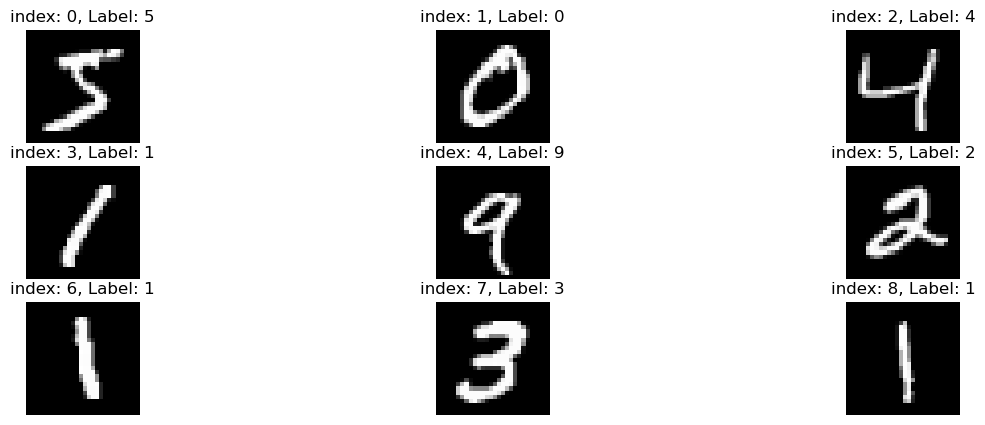

In [3]:
plt.figure(figsize=(15,5))
for i in range(9):
    plt.subplot(3, 3 , i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"index: {i}, Label: {y_train[i]}")
    plt.axis("off")
plt.show()

In [4]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2])).astype("float32")/255
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2])).astype("float32")/255

In [5]:
X_train.shape # The dense (ANN) layer requires 2D data. This process is called flattening. It is not required in CNN.

(60000, 784)

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
model = Sequential()

In [8]:
model.add(Dense(512, activation= 'relu', input_shape = (28*28,)))
model.add(Dense(256, activation="tanh"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [10]:
# define early_stopping
early_stopping = EarlyStopping(monitor = "val_loss", patience=5, restore_best_weights=True)

In [11]:
# define ModelCheckpoint
checkpoint = ModelCheckpoint("ann_best_model.keras", monitor = "val_loss", save_best_only=True)

In [12]:
# training the ann model
history = model.fit(X_train, y_train,
          epochs=10, 
          batch_size = 60,
          validation_split=0.2,
          callbacks=[early_stopping, checkpoint])

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8889 - loss: 0.3613 - val_accuracy: 0.9682 - val_loss: 0.1064
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9763 - loss: 0.0798 - val_accuracy: 0.9696 - val_loss: 0.1028
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9841 - loss: 0.0487 - val_accuracy: 0.9737 - val_loss: 0.0894
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9880 - loss: 0.0378 - val_accuracy: 0.9743 - val_loss: 0.0912
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9922 - loss: 0.0232 - val_accuracy: 0.9770 - val_loss: 0.0886
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9926 - loss: 0.0216 - val_accuracy: 0.9747 - val_loss: 0.1002
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9943 - loss: 0.0186 - val_accuracy: 0.9728 - val_loss: 0.1199
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9939 - loss: 0.0179 - val_accuracy: 0.

In [13]:
# model evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test acc: {test_acc}, test loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.9727 - loss: 0.0910
Test acc: 0.9778000116348267, test loss: 0.07777271419763565


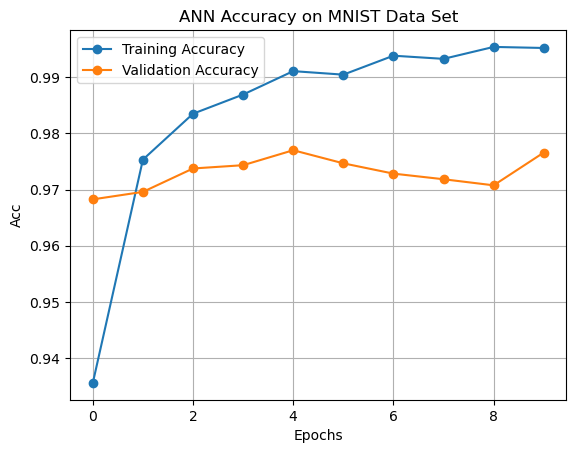

In [14]:
# training and validation accuracy visualization 
plt.figure()
plt.plot(history.history["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.title("ANN Accuracy on MNIST Data Set")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.grid(True)
plt.show()

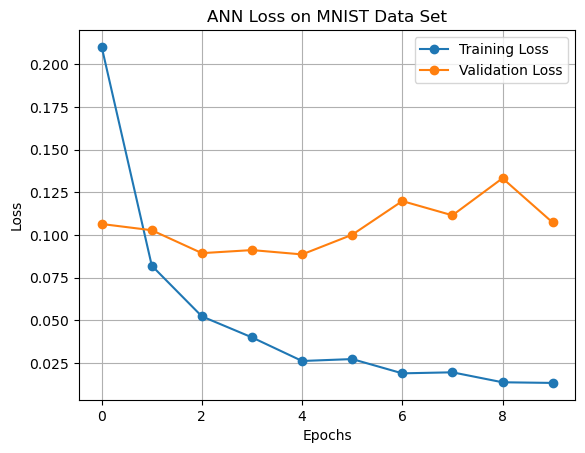

In [15]:
# training and validation loss visualization
plt.figure()
plt.plot(history.history["loss"], marker = "o", label = "Training Loss")
plt.plot(history.history["val_loss"], marker = "o", label = "Validation Loss")
plt.title("ANN Loss on MNIST Data Set")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Save model
model.save("final_mnist_ann_model.keras")

In [17]:
loaded_model = load_model("final_mnist_ann_model.keras")

In [18]:
test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print(f"Loaded Model Result -> Test acc: {test_acc}, test loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.9727 - loss: 0.0910
Loaded Model Result -> Test acc: 0.9778000116348267, test loss: 0.07777271419763565


In [44]:
import numpy as np
from PIL import Image, ImageOps, ImageFilter
import matplotlib.pyplot as plt
from keras.models import load_model

model = load_model("final_mnist_ann_model.keras")


def predict_paint_digit(path: str, blur: bool = True):
    
    img = Image.open(path).convert("L")

    arr = np.array(img).astype(np.float32)
    if arr.mean() > 127:
        img = ImageOps.invert(img)

    arr = np.array(img)
    mask = arr > 30
    if mask.any():
        ys, xs = np.where(mask)
        img = img.crop((xs.min(), ys.min(), xs.max()+1, ys.max()+1))

    w, h = img.size
    side = max(w, h)
    square = Image.new("L", (side, side), color=0)
    square.paste(img, ((side - w)//2, (side - h)//2))
    img = square

    img = img.resize((20, 20), resample=Image.Resampling.BILINEAR)

    canvas = Image.new("L", (28, 28), color=0)
    canvas.paste(img, (4, 4))
    img = canvas

    if blur:
        img = img.filter(ImageFilter.GaussianBlur(radius=0.6))

    x = (np.array(img).astype("float32") / 255.0).reshape(1, 784)

    probs = model.predict(x, verbose=0)[0]
    pred = int(np.argmax(probs))

    plt.imshow(x.reshape(28, 28), cmap="gray")
    plt.title(f"Tahmin: {pred} | Guven: {probs[pred]:.3f}")
    plt.axis("off")
    plt.show()

    return pred, probs[pred]

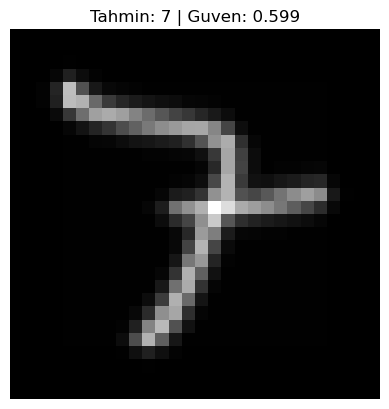

Pred: 7 Conf: 0.5989211


In [66]:
pred, conf = predict_paint_digit("/Users/burakyildiz/Desktop/deep-learning-lab/keras/artificial_neural_network/digit2.png")
print("Pred:", pred, "Conf:", conf)